# Task 2: Credit Card Fraud Detection

Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Preprocessing

In [21]:
#load the datasets
train = pd.read_csv("C:/Users/mahi/Documents/Fraud Detection/fraudTrain.csv")
test = pd.read_csv("C:/Users/mahi/Documents/Fraud Detection/fraudTest.csv")
display(train.head())
display(test.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [22]:
#concatenation of data
data = pd.concat([train, test])
display(data.head())
print(data.shape)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


(1852394, 23)


In [23]:
#check for null values
print(data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [24]:
#encoding categorical variables using label encoding
categorical_features=['category','job','gender','merchant']
for feature in categorical_features:
    label_encoder=LabelEncoder()
    data[feature]=label_encoder.fit_transform(data[feature])

In [25]:
#normalize numerical variables to a similar scale
scaler=StandardScaler()
numerical_cols=['amt','lat','long', 'city_pop', 'merch_lat', 'merch_long']
data[numerical_cols]= scaler.fit_transform(data[numerical_cols])
display(data.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,514,8,-0.408741,Jennifer,Banks,0,561 Perry Cove,...,-0.485167,0.658263,-0.282429,372,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,-0.495080,0.594463,0
1,1,2019-01-01 00:00:44,630423337322,241,4,0.233378,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,2.040531,-2.035415,-0.293527,431,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,2.080082,-2.031915,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,0.942184,Edward,Sanchez,1,594 White Dale Suite 530,...,0.718034,-1.602731,-0.280243,308,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0.903268,-1.593535,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,-0.157381,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,1.516580,-1.591951,-0.287590,330,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,1.663928,-1.623084,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,-0.176470,Tyler,Garcia,1,408 Bradley Rest,...,-0.023388,0.783024,-0.293693,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0.026642,0.842714,0


# Feature Selection

In [26]:
#creation of new features
columns=['merchant','job','amt', 'category', 'gender', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
X=data[columns]
y=data['is_fraud']
display(X.head())
display(y.head())


,merchant,job,amt,category,gender,lat,long,city_pop,merch_lat,merch_long
0,514,372,-0.408741,8,0,-0.485167,0.658263,-0.282429,-0.495080,0.594463
1,241,431,0.233378,4,0,2.040531,-2.035415,-0.293527,2.080082,-2.031915
2,390,308,0.942184,0,1,0.718034,-1.602731,-0.280243,0.903268,-1.593535
3,360,330,-0.157381,2,1,1.516580,-1.591951,-0.287590,1.663928,-1.623084
4,297,116,-0.176470,9,1,-0.023388,0.783024,-0.293693,0.026642,0.842714


0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# Data Visualization

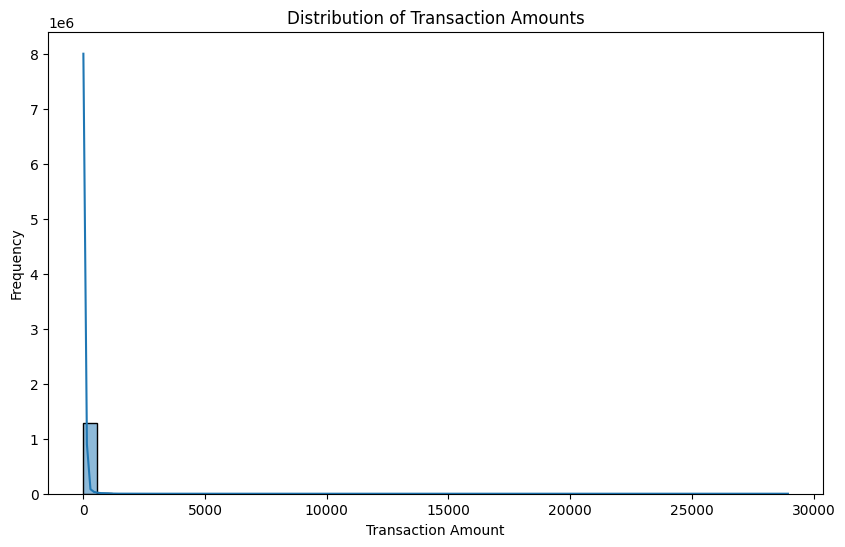

In [27]:
#histogram for transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(train['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

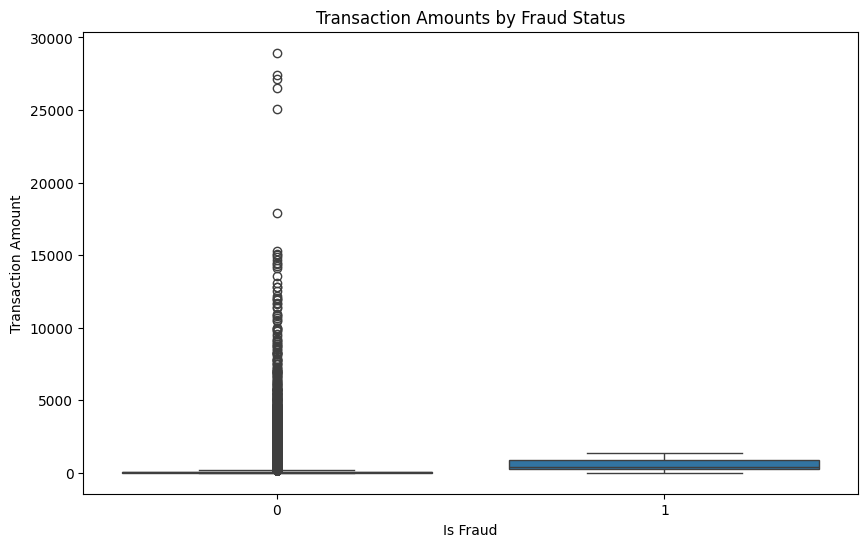

In [28]:
#box plot for transaction amounts by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=train)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

# Model Training

In [29]:
#splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#implement Logistic Regression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
#make predictions
y_pred_log_model=log_model.predict(X_test)

In [32]:
accuracy_lr = accuracy_score(y_test, y_pred_log_model)
precision_lr = precision_score(y_test, y_pred_log_model)
recall_lr = recall_score(y_test, y_pred_log_model)
f1_lr = f1_score(y_test, y_pred_log_model)

In [33]:
#implement decision tree
dt_tree=DecisionTreeClassifier()
dt_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
#make predictions
y_pred_dt_tree=dt_tree.predict(X_test)

In [35]:
accuracy_dt_tree = accuracy_score(y_test, y_pred_dt_tree)
precision_dt_tree = precision_score(y_test, y_pred_dt_tree)
recall_dt_tree = recall_score(y_test, y_pred_dt_tree)
f1_dt_tree = f1_score(y_test, y_pred_dt_tree)

In [37]:
# Reduce the dataset size for testing 
X_train_sample = X_train[:1000]
y_train_sample = y_train[:1000]

# Initialize the RandomForest with optimized hyperparameters and verbose output
ran_forest = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1, verbose=2)

# Fit the model on the reduced dataset
ran_forest.fit(X_train_sample, y_train_sample)


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1, verbose=2)

In [38]:
#make predictions
y_pred_ran_forest=ran_forest.predict(X_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [39]:
accuracy_ran_forest = accuracy_score(y_test, y_pred_ran_forest)
precision_ran_forest = precision_score(y_test, y_pred_ran_forest)
recall_ran_forest = recall_score(y_test, y_pred_ran_forest)
f1_ran_forest = f1_score(y_test, y_pred_ran_forest)

# Model Evaluation

In [40]:
data = {
    "Model": ["Logistic Regression", "Decision Tree","Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_dt_tree, accuracy_ran_forest],
    "Precision": [precision_lr, precision_dt_tree, precision_ran_forest],
    "Recall": [recall_lr, recall_dt_tree, recall_ran_forest],
    "F1 Score": [f1_lr, f1_dt_tree, f1_ran_forest],
}

df_metrics = pd.DataFrame(data)
display(df_metrics)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.994302,0.000000,0.000000,0.000000
1,Decision Tree,0.995854,0.601856,0.630824,0.616000
2,Random Forest,0.994572,0.442231,0.113671,0.180855
